# Titanic: Machine Learning from Disaster
---


## Frame the problem
---
### Background
---
From the kaggle challenge page:
> The sinking of the Titanic is one of the most infamous shipwrecks in history.
>
> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>
>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Dataset
---
Below is a table containing the contents of the dataset named `train.csv`:

| Variable  | Definition                                 	| Key                                            	|
|-----------|:----------------------------------------------|:--------------------------------------------------|
| Survived  | Survival                                   	| 0 = No, 1 = Yes                                	|
| Pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| Sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| SibSp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| Parch    	| # of parents / children aboard the Titanic 	|                                                	|
| Ticket   	| Ticket number                              	|                                                	|
| Fare     	| Passenger fare                             	|                                                	|
| Cabin    	| Cabin number                               	|                                                	|
| Embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

## Set-up
---
Here, we set up all the paths and libraries used in the program, as well as important variables

In [1]:
import os,sys

globalT3Mbin = os.path.abspath(os.path.join(os.getcwd(),'..','..','bin'))
round1bin = os.path.abspath(os.path.join(os.getcwd(),'..','bin'))
if not (globalT3Mbin in sys.path):
    sys.path.append(globalT3Mbin)
if not (round1bin in sys.path):
    sys.path.append(round1bin)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import splitter

In [3]:
from pathlib import Path
data_folder_path = Path("../data")
training_set_path = data_folder_path / "train.csv"


In [4]:
seed = 1
plt.style.use('dark_background')

## Gather Data
---


In [5]:
data_set = pd.read_csv(training_set_path)
feature_names = data_set.columns.values
label_names = ['Survived']
print("The names of the features are - " +str(feature_names))



The names of the features are - ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
data_set_X, data_set_Y = splitter.split_from_labels(data_set,label_names)

training_set, validation_set, test_set = splitter.split_tvt_set(data_set,[3,1,1],seed)
training_set_X, training_set_Y = splitter.split_from_labels(training_set,label_names)
validation_sett_X, validation_set_Y = splitter.split_from_labels(validation_set,label_names)
test_set_X, test_set_Y = splitter.split_from_labels(test_set,label_names)

## Data Insights
---
### Distribution of features
First, let us observe what the dsitribution of features is.

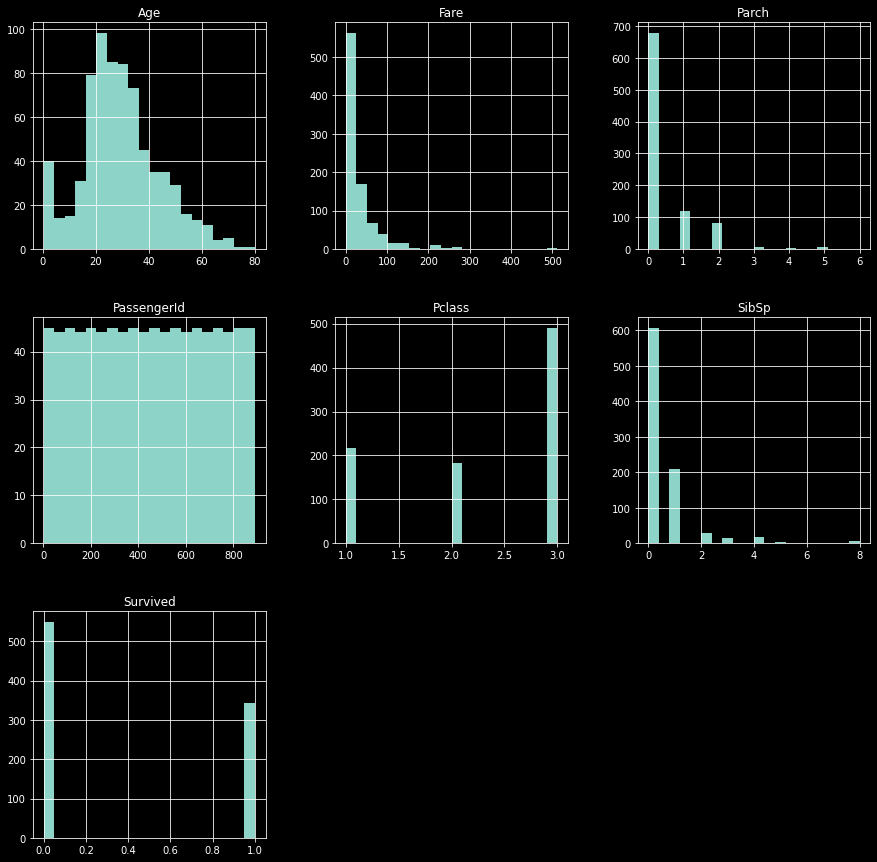

In [20]:
data_set.hist(bins=20,figsize=(15,15))
plt.show()

### Correlation
Let us check what the correlation between different features is:

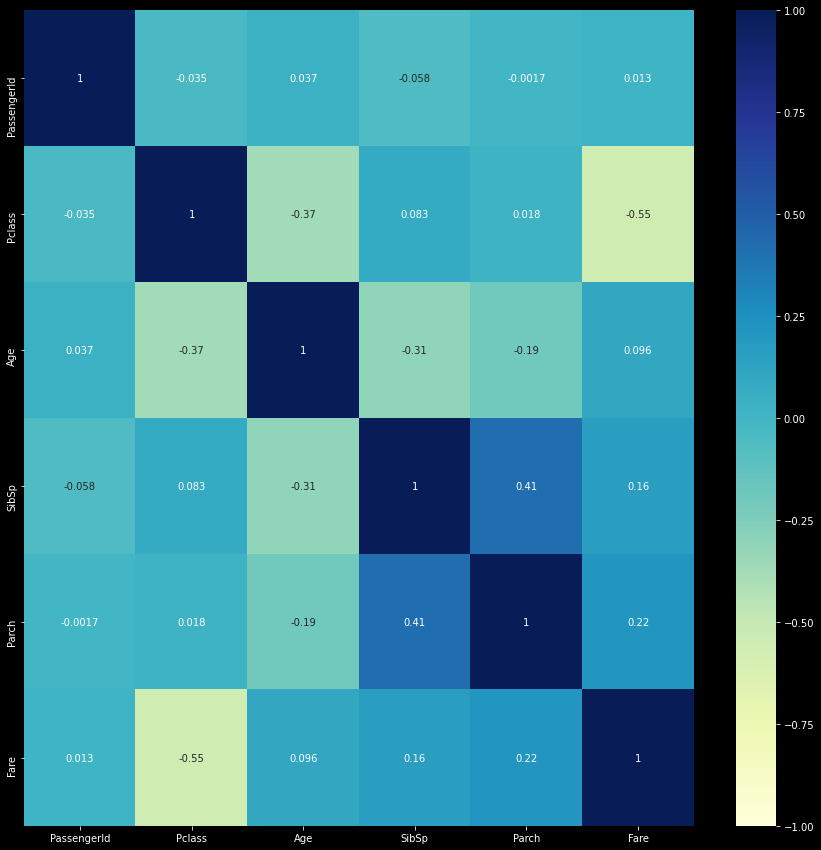

In [23]:
correlation_matrix = data_set_X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

Lets look at the features which are most correlated:

1. **Pclass and Fare** - Naturally, the higher the class (i.e. smaller the number), the more expensive it is.
2. **SibSp and Parch** - This makes sense. If you have a spouse on board, then your children might be one as well, and if you have siblings on board, then you are likely to be a child and have your parents on board